In [35]:
import os
import pandas as pd

pef = os.path.join('..', 'data', '1q2023.xlsx')

pef_df=pd.read_excel(pef)
pef_df= pef_df.clean_names()


In [36]:
print(
    'El tamaño del dataframe es de',
    pef_df.shape
)

El tamaño del dataframe es de (171662, 38)


In [37]:
pd.DataFrame(pef_df.dtypes)

,0
ciclo,int64
id_ramo,int64
desc_ramo,object
id_ur,object
desc_ur,object
gpo_funcional,int64
desc_gpo_funcional,object
id_funcion,int64
desc_funcion,object
id_subfuncion,int64


### Revisando valores faltantes

<AxesSubplot:>

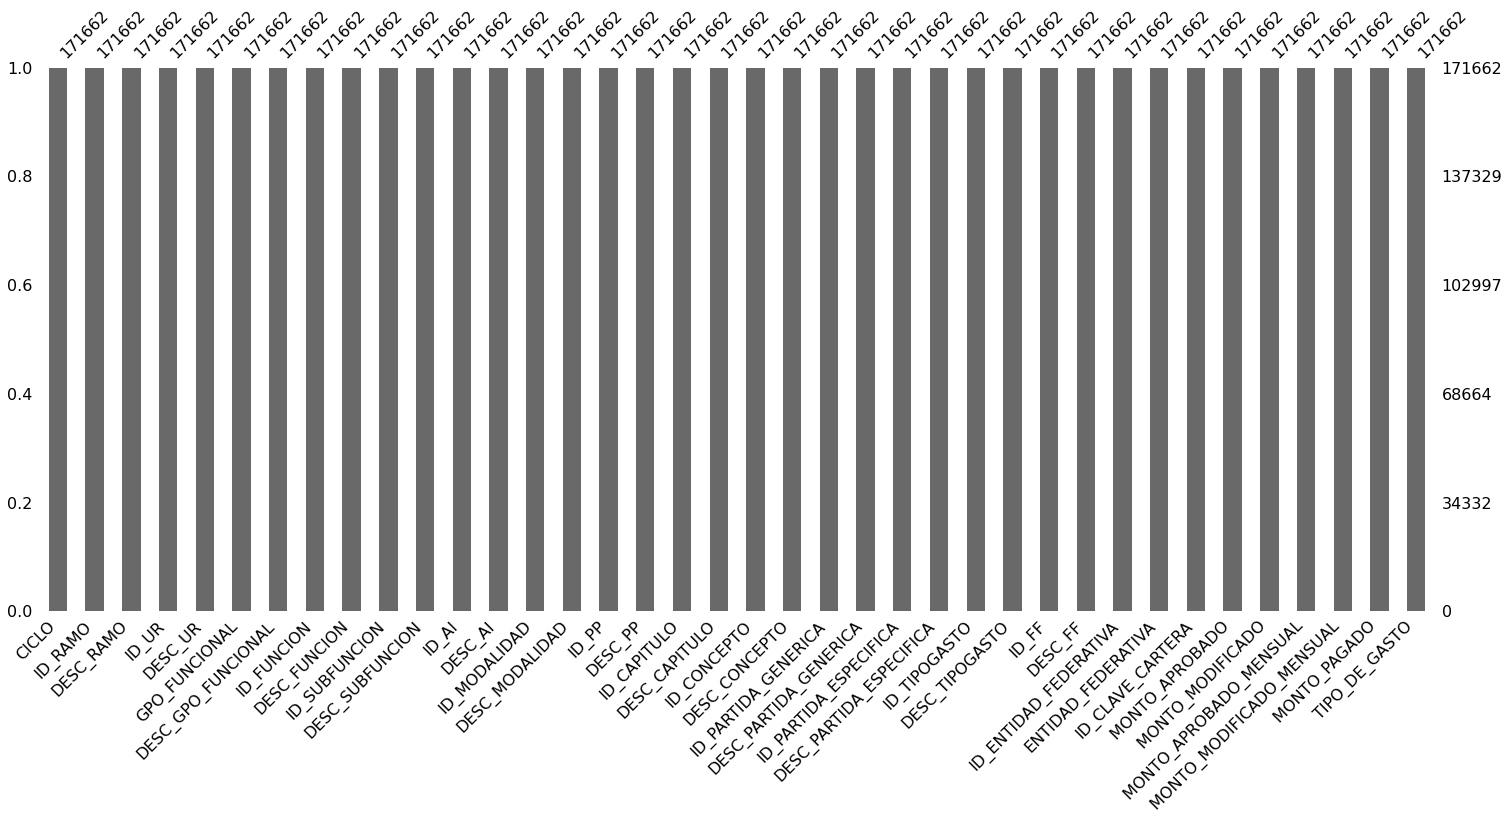

In [15]:
import missingno as msno
msno.bar(pef_df)


In [24]:


for _ in pef_df.columns:
        print (pef_df[_].unique())

[2023]
[53 51 50 52  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 18 19 20 21
 22 23 24 25 27 28 30 31 32 33 34 35 36 37 38 40 41 43 44 45 46 47 48 49]
['Comisión Federal de Electricidad'
 'Instituto de Seguridad y Servicios Sociales de los Trabajadores del Estado'
 'Instituto Mexicano del Seguro Social' 'Petróleos Mexicanos'
 'Poder Legislativo' 'Oficina de la Presidencia de la República'
 'Poder Judicial' 'Gobernación' 'Relaciones Exteriores'
 'Hacienda y Crédito Público' 'Defensa Nacional'
 'Agricultura y\xa0Desarrollo Rural'
 'Infraestructura, Comunicaciones y Transportes' 'Economía'
 'Educación Pública' 'Salud' 'Marina' 'Trabajo y Previsión Social'
 'Desarrollo Agrario, Territorial y Urbano'
 'Medio Ambiente y Recursos Naturales' 'Energía'
 'Aportaciones a Seguridad Social' 'Bienestar' 'Turismo'
 'Instituto Nacional Electoral' 'Provisiones Salariales y Económicas'
 'Deuda Pública'
 'Previsiones y Aportaciones para los Sistemas de Educación Básica, Normal, Tecnológica y de Adulto

### Revisando por descripción del ramo

In [22]:
pef_df['desc_ramo'].unique()

array(['Comisión Federal de Electricidad',
       'Instituto de Seguridad y Servicios Sociales de los Trabajadores del Estado',
       'Instituto Mexicano del Seguro Social', 'Petróleos Mexicanos',
       'Poder Legislativo', 'Oficina de la Presidencia de la República',
       'Poder Judicial', 'Gobernación', 'Relaciones Exteriores',
       'Hacienda y Crédito Público', 'Defensa Nacional',
       'Agricultura y\xa0Desarrollo Rural',
       'Infraestructura, Comunicaciones y Transportes', 'Economía',
       'Educación Pública', 'Salud', 'Marina',
       'Trabajo y Previsión Social',
       'Desarrollo Agrario, Territorial y Urbano',
       'Medio Ambiente y Recursos Naturales', 'Energía',
       'Aportaciones a Seguridad Social', 'Bienestar', 'Turismo',
       'Instituto Nacional Electoral',
       'Provisiones Salariales y Económicas', 'Deuda Pública',
       'Previsiones y Aportaciones para los Sistemas de Educación Básica, Normal, Tecnológica y de Adultos',
       'Función Pública',


### Graficando por institución

In [94]:
import ipywidgets as widgets
import plotly.graph_objects as go

# Lista de desc_ramo
ramos = pef_df['desc_ramo'].unique().tolist()

# Widget Dropdown
ramo_dropdown = widgets.Dropdown(
    options=ramos,
    value=ramos[0],
    description='Ramo:',
)

# Función para generar gráfico
def plot_graph(ramo):
    ramo_df = pef_df[pef_df['desc_ramo'] == ramo]
    ramo_df = ramo_df.groupby('desc_concepto').agg(
        monto_aprobado_mensual = ('_monto_aprobado_mensual', 'sum'),
        monto_pagado = ('_monto_pagado', 'sum')
    ).sort_values('monto_aprobado_mensual', ascending=True)  # Agrega sort_values aquí

    # Creando las barras para el Monto Aprobado
    trace1 = go.Bar(
        y=ramo_df.index,  # eje Y
        x=ramo_df['monto_aprobado_mensual'],  # eje X
        name='Monto Aprobado',
        orientation='h',  # Cambia la orientación a horizontal
        marker_color='blue'
    )

    # Creando las barras para el Monto Pagado
    trace2 = go.Bar(
        y=ramo_df.index,  # eje Y
        x=ramo_df['monto_pagado'],  # eje X
        name='Monto Pagado',
        orientation='h',  # Cambia la orientación a horizontal
        marker_color='green'
    )

    # Agregamos las barras en la gráfica
    data = [trace1, trace2]

    # Creamos el layout
    layout = go.Layout(
        title=f'{ramo} - Comparación entre el Monto Aprobado y el Monto Pagado',
        barmode='group',  # permite agrupar las barras en vez de superponerlas
        xaxis=dict(
            title='Monto',
            tickformat=","  # Agrega formato de comas a las marcas del eje X
        ),
        yaxis=dict(title='Concepto', automargin=True),  # automargin ayuda a ajustar el margen automáticamente para el texto de etiqueta
        plot_bgcolor='white',  # Cambia el color de fondo del plot
        paper_bgcolor='white',  # Cambia el color de fondo del paper
        font=dict(
            size=14,  # Cambia el tamaño de la fuente
            color="black"  # Cambia el color de la fuente
        )
    )

    # Creamos el objeto Figure y visualizamos
    fig = go.Figure(data=data, layout=layout)
    fig.update_layout(
        separators=".,",  # Ajusta el formato de los números a español
        width=1200, 
        height=1200  # Agrega aquí las dimensiones de la gráfica
    )
    fig.show()

# Función para manejar el evento de cambio en el Dropdown
def on_ramo_change(change):
    plot_graph(change.new)

# Asociamos la función 'on_ramo_change' al evento 'value' del Dropdown
ramo_dropdown.observe(on_ramo_change, names='value')

# Mostramos el Dropdown
display(ramo_dropdown)

# Generamos el primer gráfico
plot_graph(ramos[0])


Dropdown(description='Ramo:', options=('Comisión Federal de Electricidad', 'Instituto de Seguridad y Servicios…